The total dataset is size of this is 28709

In [1]:
# !wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

In [2]:
# !unzip dataset.zip?dl=0

# Deleting the directory which is already present

In [3]:
# import shutil

# # Define the path to the directory you want to delete
# directory_to_delete = "/content/test"

# # Use shutil.rmtree to delete the directory and its contents
# shutil.rmtree(directory_to_delete)

# # Verify that the directory has been deleted
# print(f"Directory '{directory_to_delete}' has been deleted.")


In [4]:
# !wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
# !unzip train.zip?dl=0

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

#  Building our Model To train the data

In [6]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [7]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [8]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [9]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

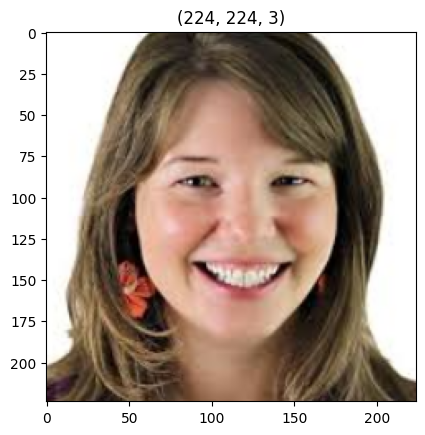

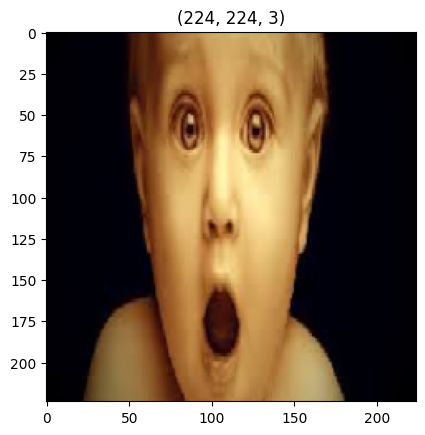

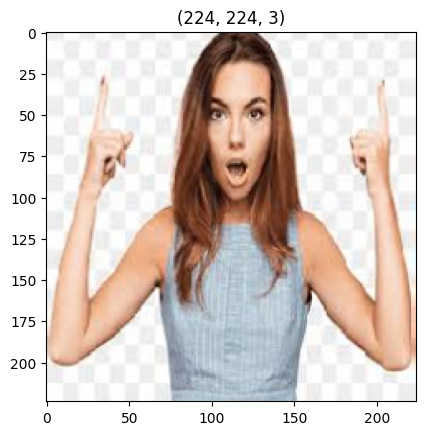

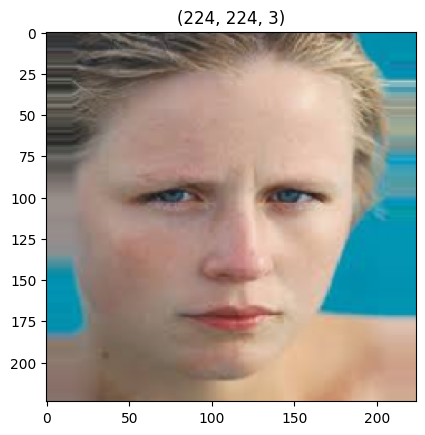

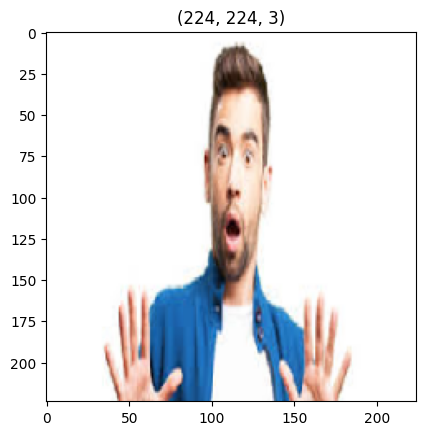

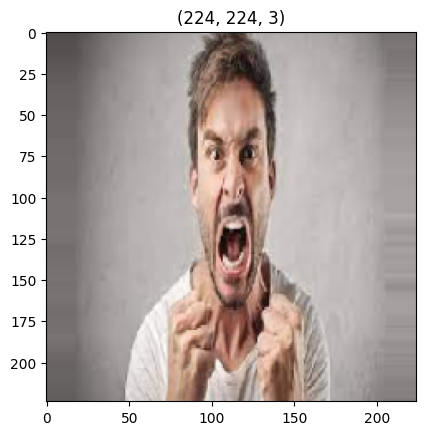

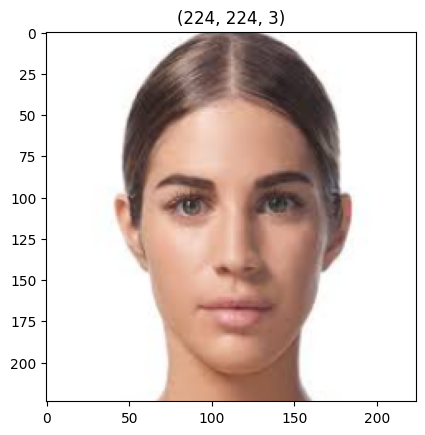

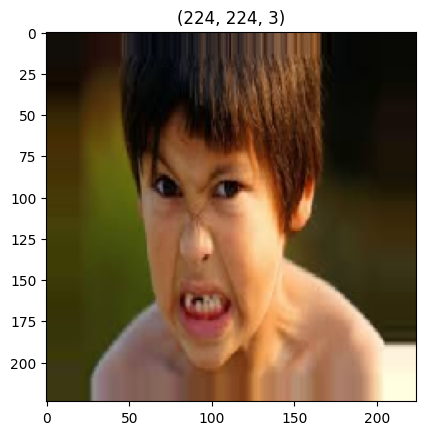

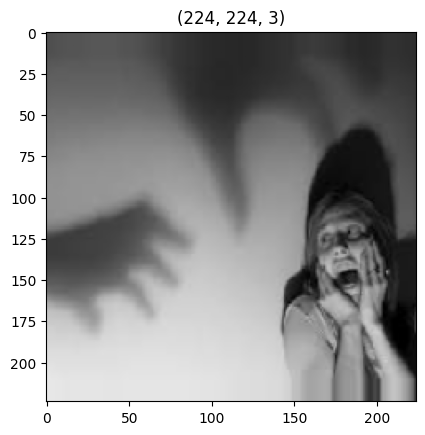

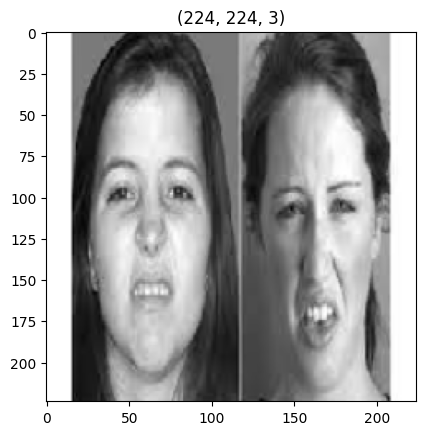

In [10]:
# to visualize the images in the traing data denerator

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

# having early stopping and model check point

In [11]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [12]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 10,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

<ipython-input-12-5c7d8de7e46f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 11.5460 - accuracy: 0.1981
Epoch 1: val_accuracy improved from -inf to 0.45703, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 15s 474ms/step - loss: 11.5460 - accuracy: 0.1981 - val_loss: 5.7751 - val_accuracy: 0.4570
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 5.8574 - accuracy: 0.5346
Epoch 2: val_accuracy improved from 0.45703 to 0.65625, saving model to best_model.h5
10/10 [==============================] - 5s 542ms/step - loss: 5.8574 - accuracy: 0.5346 - val_loss: 2.5986 - val_accuracy: 0.6562
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 1.9816 - accuracy: 0.7138
Epoch 3: val_accuracy improved from 0.65625 to 0.79688, saving model to best_model.h5
10/10 [==============================] - 5s 493ms/step - loss: 1.9816 - accuracy: 0.7138 - val_loss: 1.4500 - val_accuracy: 0.7969
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 1.1879 - accuracy: 0.8082
Epoch 4: val_accuracy improved from 0.79688 to 0.91406, saving model to best_model.h5
10/10 [==============================] - 4s 423ms/step - loss: 1.

In [13]:

# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [14]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

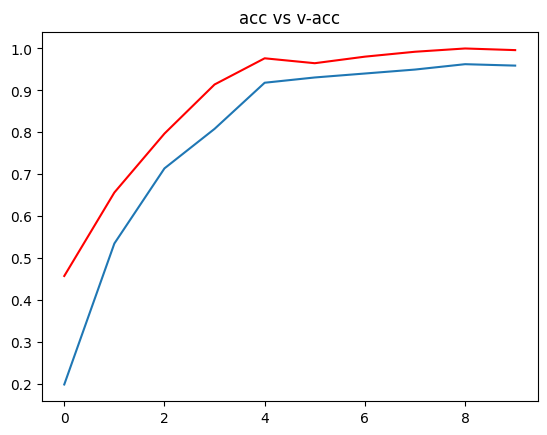

In [15]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

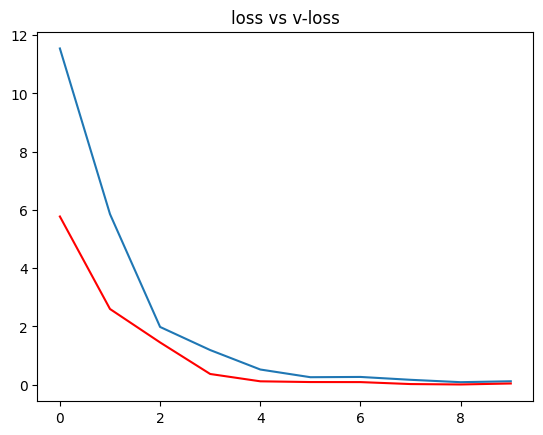

In [16]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [17]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 23ms/step
 the image is of Happy


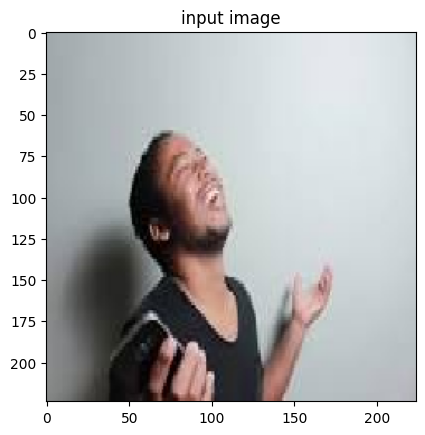

In [21]:
# path for the image to see if it predics correct class

path = "/content/download (1).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()